<a href="https://colab.research.google.com/github/henriquevedoveli/correcao-provas/blob/master/correcao_provas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correção de Provas com OMR

---

![](images-test/prova1.jpg)

---

## ***Objetivo***
### O objetivo deste projeto é utilizar alguns metódos de processamento de imagem para criar um algoritmo capaz de detectar e reconhecer escolhas realizadas em testes de múltiplas escolhas.

---
## ***Base de Dados***
Todos os dados utilizados neste projeto podem ser encontrados [neste repositório]( ), os dados foram extraidos e modificados do [dataset original](https://sites.google.com/view/mcq-dataset) que foi utilizado como base de dados original para o artigo **The Achievement of Higher Flexibility in Multiple Choice-based Tests Using Image Classification Techniques** (AFIFI, Mahmoud ; HUSSAIN, Khaled F. 2019) 

> O artigo pode ser encontrado clicando [aqui](https://arxiv.org/pdf/1711.00972.pdf)

---

## ***Countéudo do Projeto***
> - Filtros de Transoformação
    - Threshold
    - Canny
    - Operações Morfológicas

  - Econtrar os contornos das imagens
  - Enconstrar linhas utilizando tranformações entre sistemas de coordenadas
  - Extrair informações baseadas em cores

---
---



In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


Bibliotecas Necessárias

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math
import pandas as pd


### Definindo função para abrir imagem

> A função recebe como parâmetro o caminho da imagem em uma String e retorna a Matriz da imagem. Caso não encontre o caminho será retornado um erro.

In [2]:
def abrir_imagem(img_caminho):
    imagem = cv2.imread(img_caminho)

    if(imagem is None):
        raise NameError('\nO OpenCV não conseguiu abrir a imagem. Verifique o caminho que você passou ou se a imagem existe.\n')

    return imagem

In [5]:
path = lambda img_nome: 'My Drive/data_science/correcao-provas/images-test/'+img_nome
nome_imagem = 'teste1.png'
imagem = abrir_imagem(path(nome_imagem))


# Pesquisar THRESH BINARY E THRESH OTSU

In [ ]:
img_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

thres, img_binarizada = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

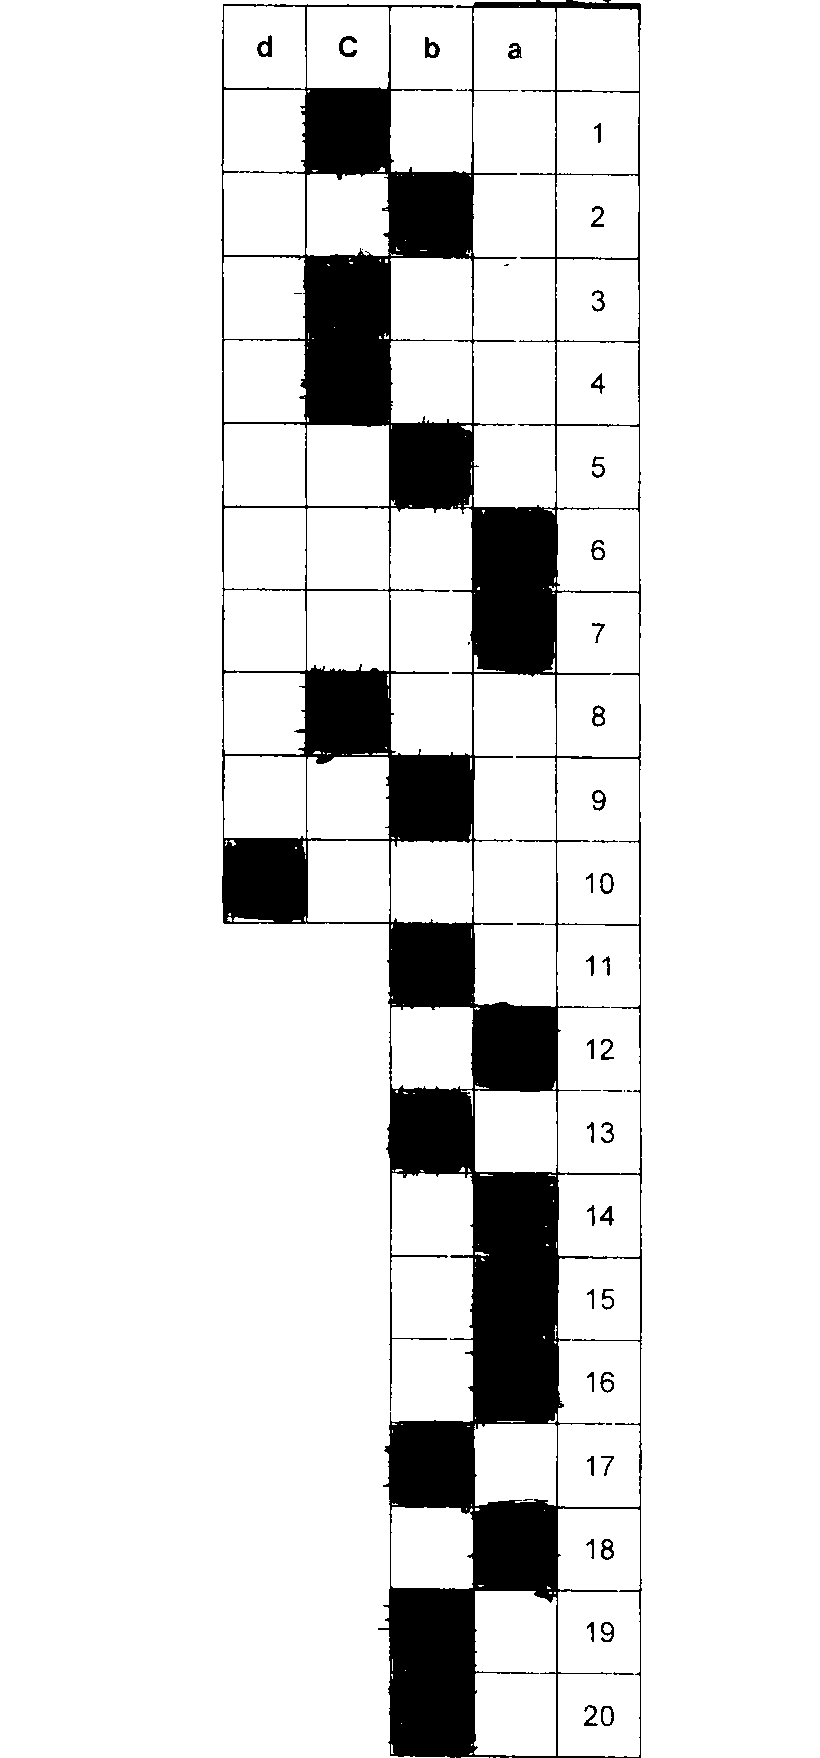

In [ ]:
cv2_imshow(img_binarizada)

Utilizaremos Canny para visualizar as bordas da imagem, que obtem o gradiente da imagem binarizada, foi utilizado como parâmetro 100 e 200, sendo assim o que estiver entre 100 e 200 não seram considerados bordas.

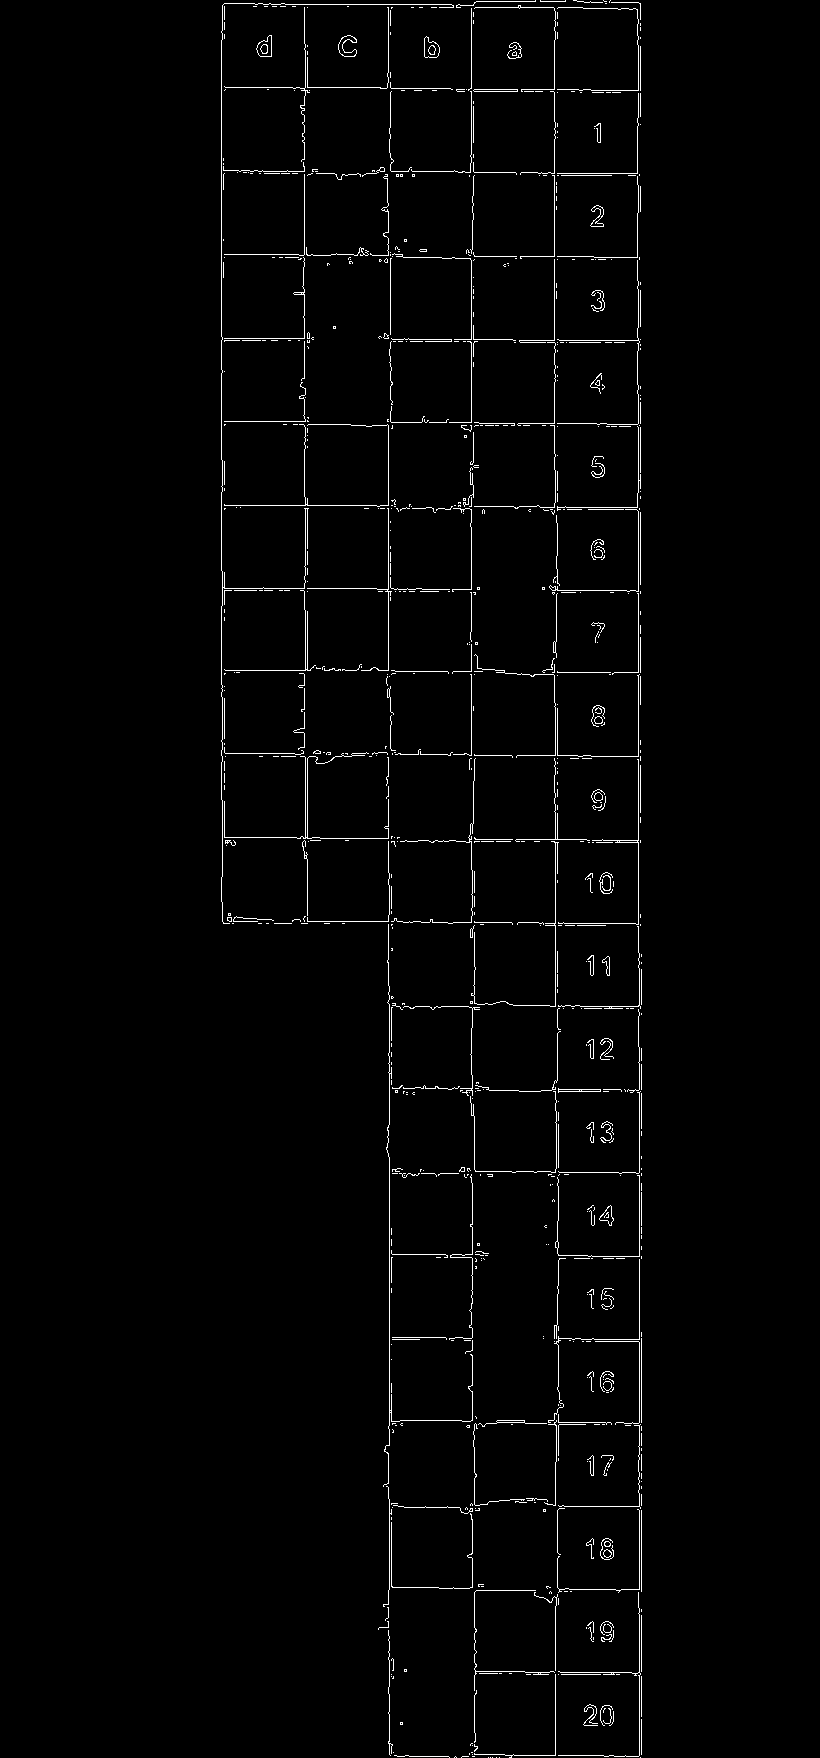

In [ ]:
canny = cv2.Canny(img_binarizada, 100, 200)
cv2_imshow(canny)

Para melhorar o resultados das bordas serão utilizadas operações morfológicas.

# PESQUISAR MORPH DILATE

[[1 1 1]
 [1 1 1]
 [1 1 1]]


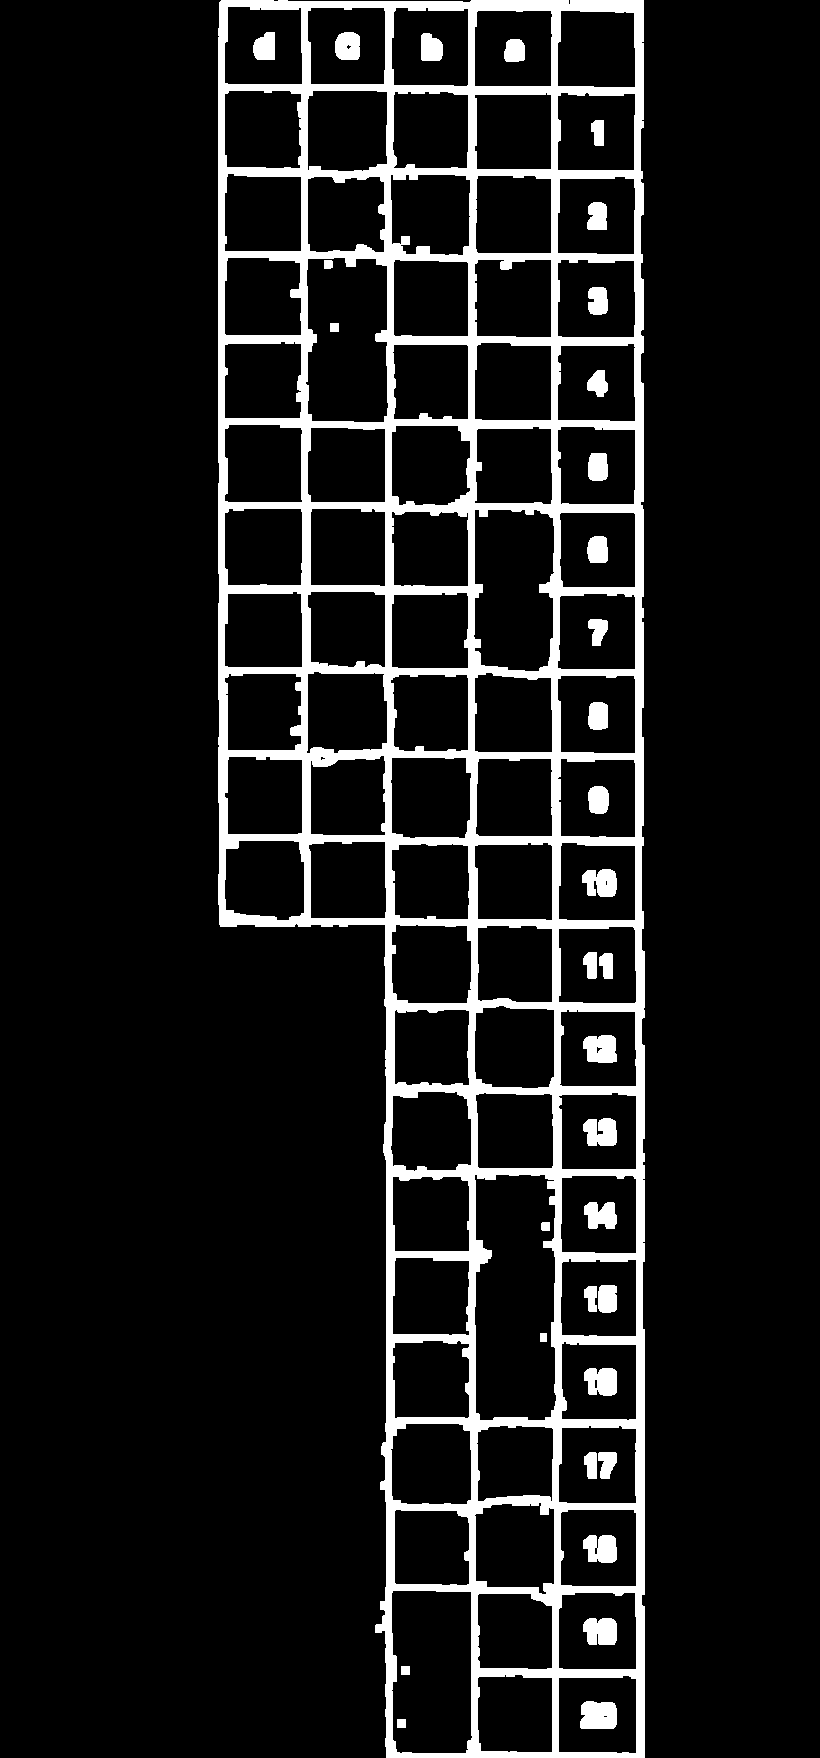

In [ ]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img_rect = cv2.morphologyEx(canny, cv2.MORPH_DILATE, kernel_rect, iterations = 3)

print(kernel_rect)
cv2_imshow(img_rect)

[[1 1 1]]


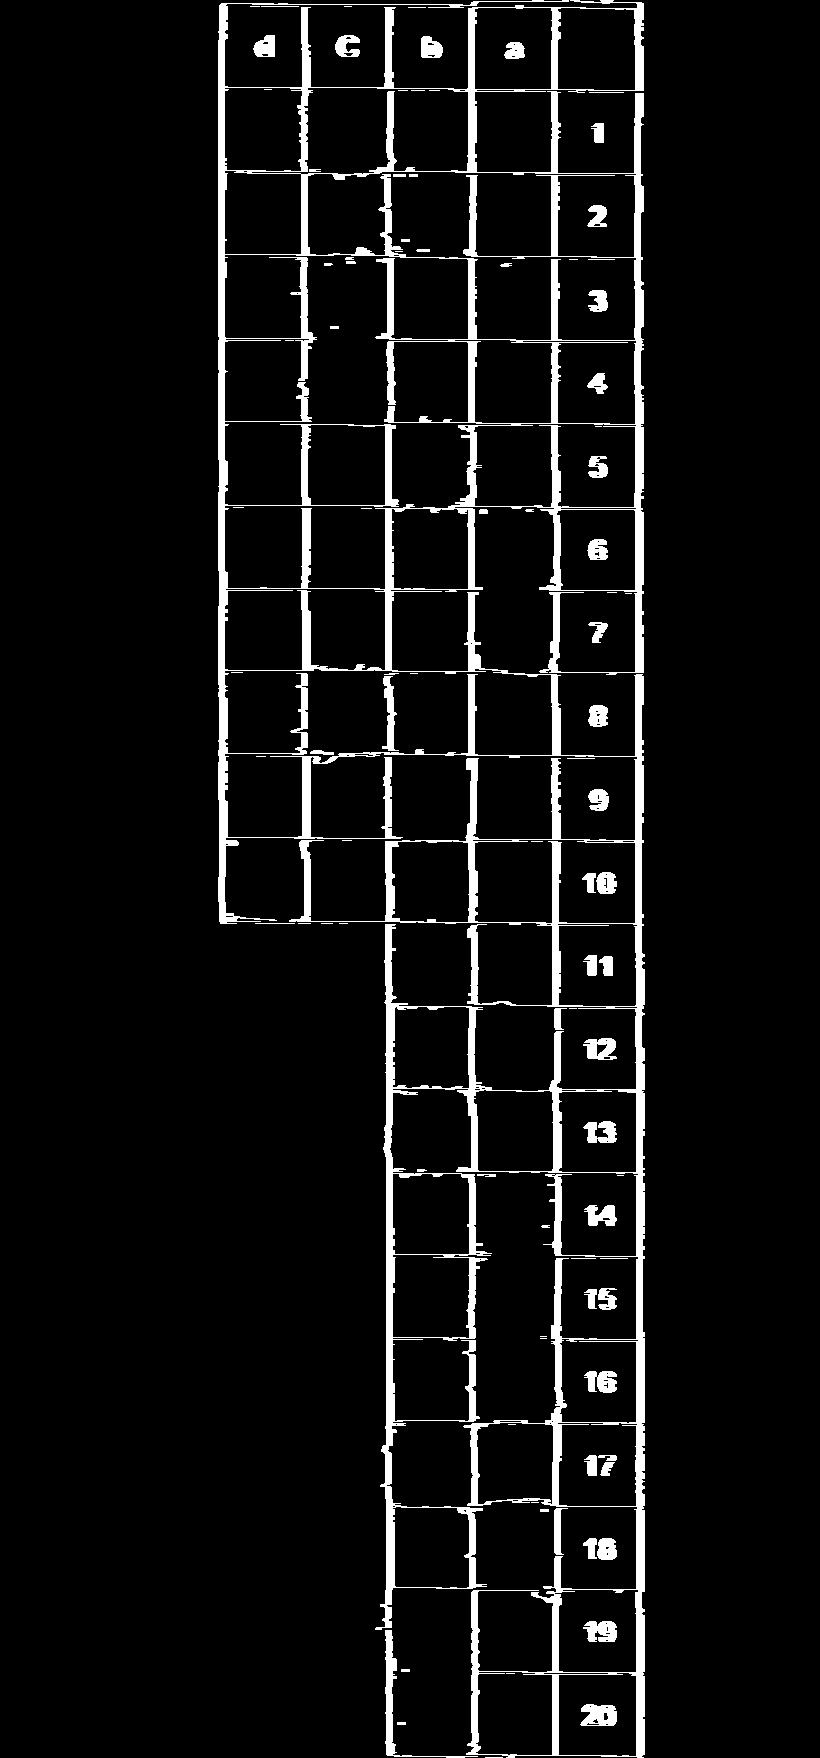

In [ ]:
kernel_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (3,1))
img_vertical = cv2.morphologyEx(canny, cv2.MORPH_DILATE, kernel_vertical, iterations = 3)

print(kernel_vertical)
cv2_imshow(img_vertical)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


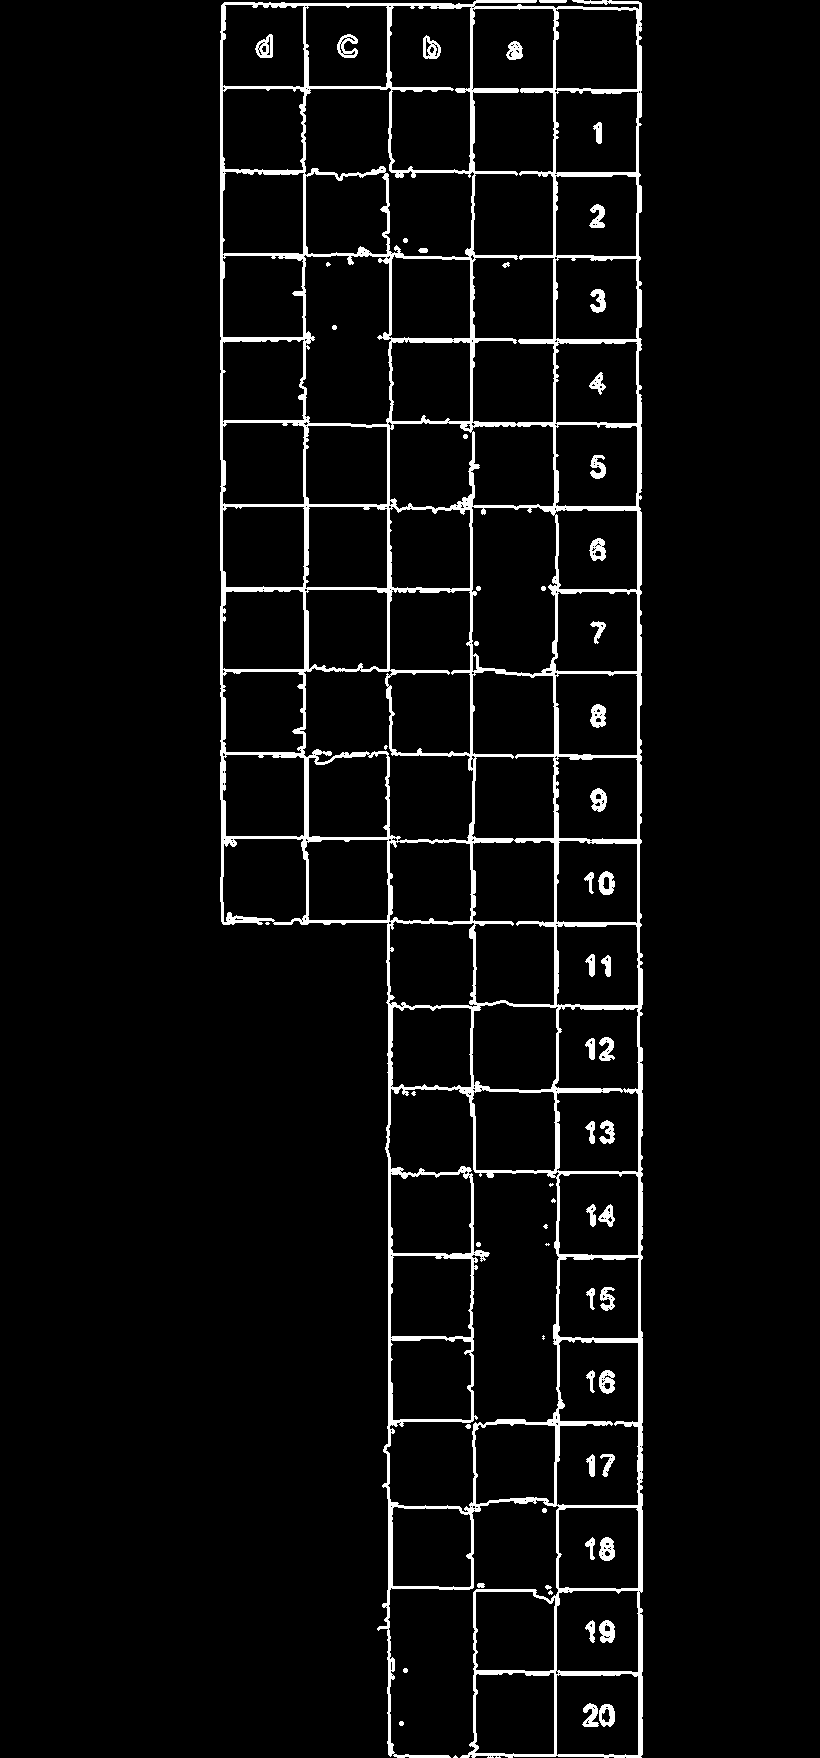

In [ ]:
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
img_cross = cv2.morphologyEx(canny, cv2.MORPH_DILATE, kernel_cross)

print(kernel_cross)
cv2_imshow(img_cross)

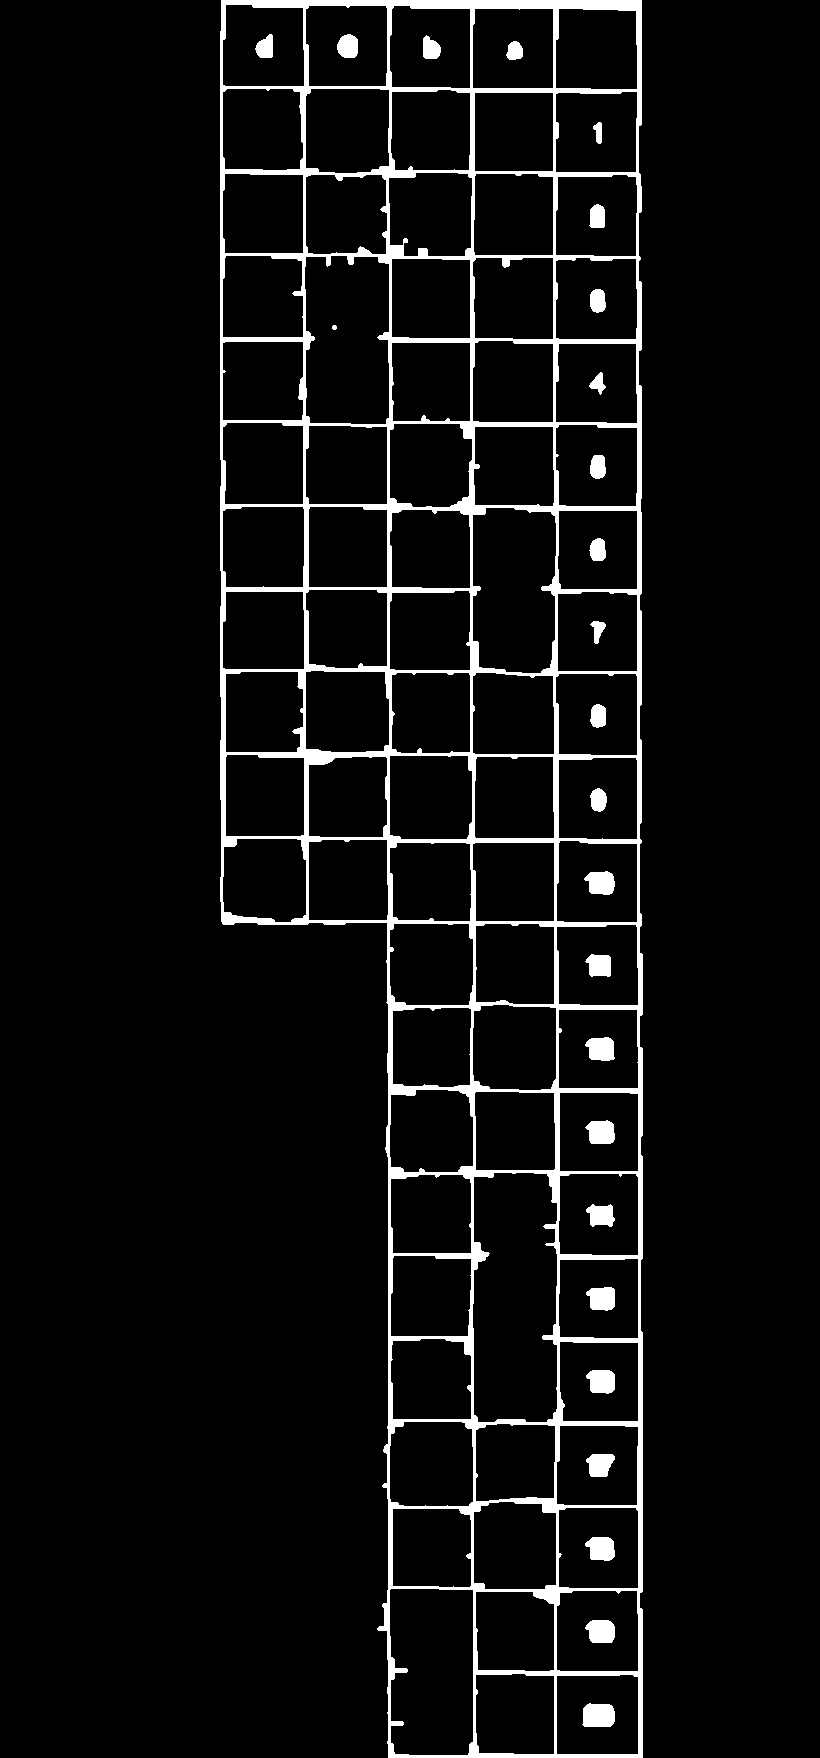

In [ ]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
oper_close = cv2.morphologyEx(img_cross, cv2.MORPH_CLOSE, kernel_rect,iterations=3)
cv2_imshow(oper_close)

Transformando coordenadas polares em coordenadas cartesianas

In [ ]:
def polares_para_cartesiana(raio, theta):
  seno = math.sin(theta)
  coss = math.cos(theta)

  x = raio*coss
  y = raio*seno

  return (x,y)

In [ ]:
def cria_linha(ponto, theta):

  seno = math.sin(theta)
  cosseno = math.cos(theta)

  x1 = int(ponto[0] + 1000*(-seno))
  y1 = int(ponto[1] + 1000*(cosseno))
  
  x2 = int(ponto[0] - 1000*(-seno))
  y2 = int(ponto[1] - 1000*(cosseno))

  return (x1,y1,x2,y2)

In [ ]:
def desenha_linha(img, raio, theta):
  p = polares_para_cartesiana(raio, theta)
  x1,y1,x2,y2 = cria_linha(p, theta)

  img = cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 3 )

  return img

In [ ]:
l_linhas = cv2.HoughLines(oper_close, 1 , np.pi/180, 80)

limites_horizontais =  np.array([
                        [imagem.size, imagem.size], # menor
                        [0.0,0.0]], dtype = np.float # maior
                      )

limites_verticais =  np.array([
                        [imagem.size, imagem.size], # menor
                        [0.0,0.0]], dtype = np.float # maior
                        )

for linha in l_linhas:
  for raio, theta in linha:
    if np.isclose(theta, 0): # linha vertical
      if raio < limites_verticais[0][0]:
        limites_verticais[0][0] = raio
        limites_verticais[0][1] = theta

      if raio > limites_verticais[1][0]:
        limites_verticais[1][0] = raio
        limites_verticais[1][1] = theta

    elif np.isclose(theta, np.pi/2.0): #linha horizontal
      if raio < limites_horizontais[0][0]:
        limites_horizontais[0][0] = raio
        limites_horizontais[0][1] = theta

      if raio > limites_horizontais[1][0]:
        limites_horizontais[1][0] = raio
        limites_horizontais[1][1] = theta


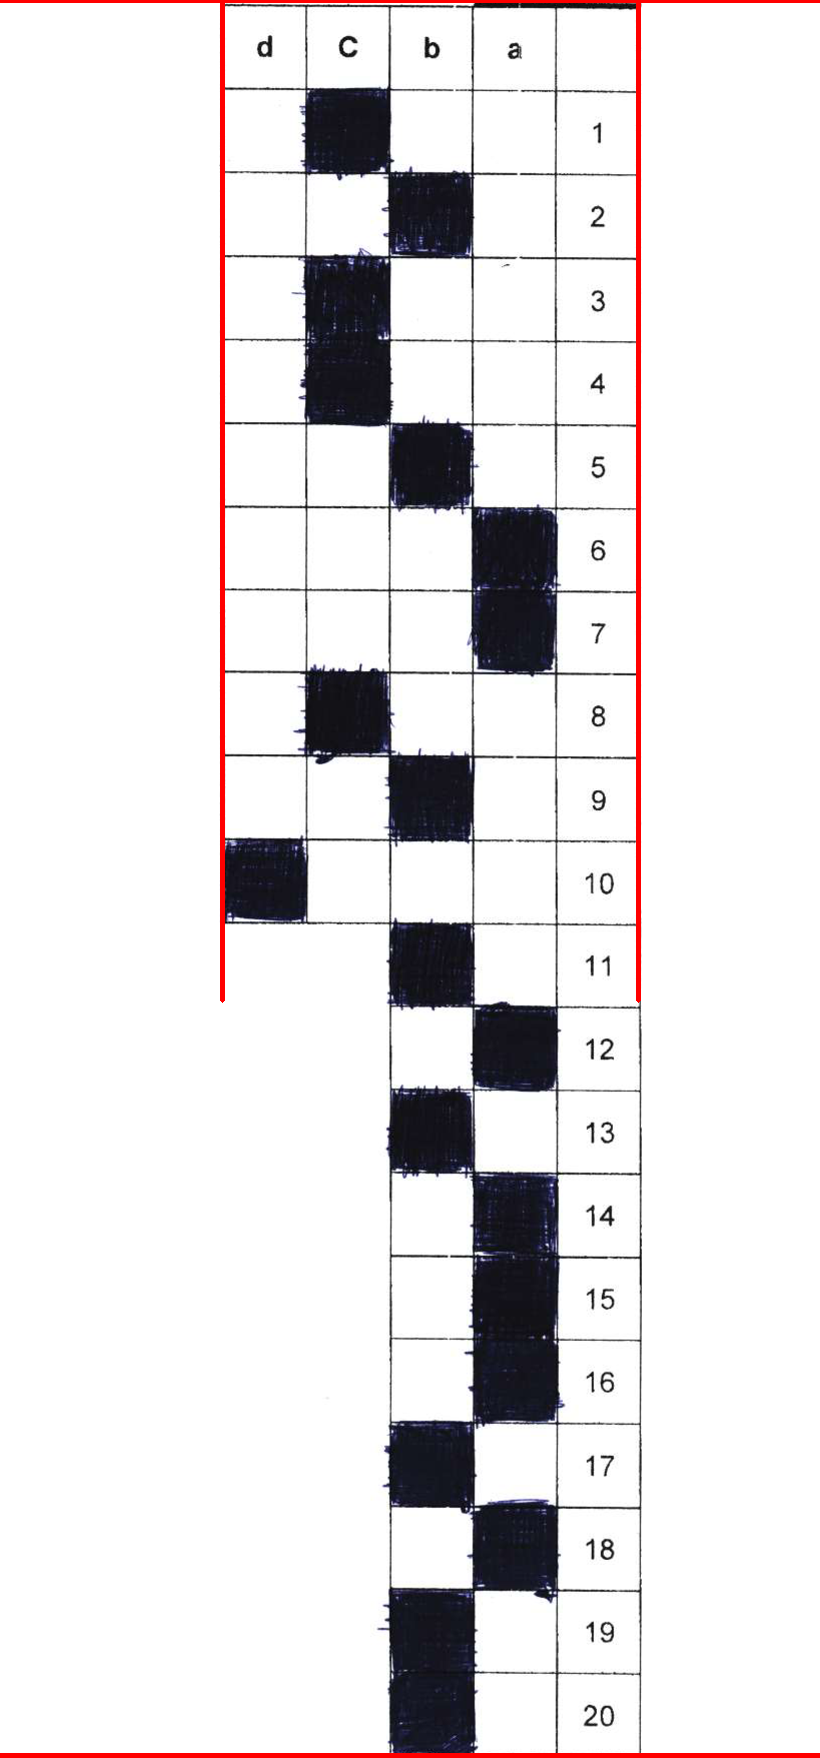

In [ ]:
img_copy = imagem.copy()   

for i in range(2):
    img_copy = desenha_linha(img_copy, limites_horizontais[i][0], limites_horizontais[i][1])
    img_copy = desenha_linha(img_copy, limites_verticais[i][0], limites_verticais[i][1])

cv2_imshow(img_copy)

In [ ]:
def encontra_interseccao(raio1, raio2):
  resultante = math.sqrt((raio1**2 + raio2**2))
  theta = math.atan((raio1 / raio2))

  return resultante, theta

In [ ]:
#ponto superior esquerdo
raio_se, theta_se = encontra_interseccao(limites_horizontais[0][0], limites_verticais[0][0])
x_se, y_se = polares_para_cartesiana(raio_se, theta_se)

#ponto inferior direito
raio_id, theta_id = encontra_interseccao(limites_horizontais[1][0], limites_verticais[1][0])
x_id, y_id = polares_para_cartesiana(raio_id, theta_id)

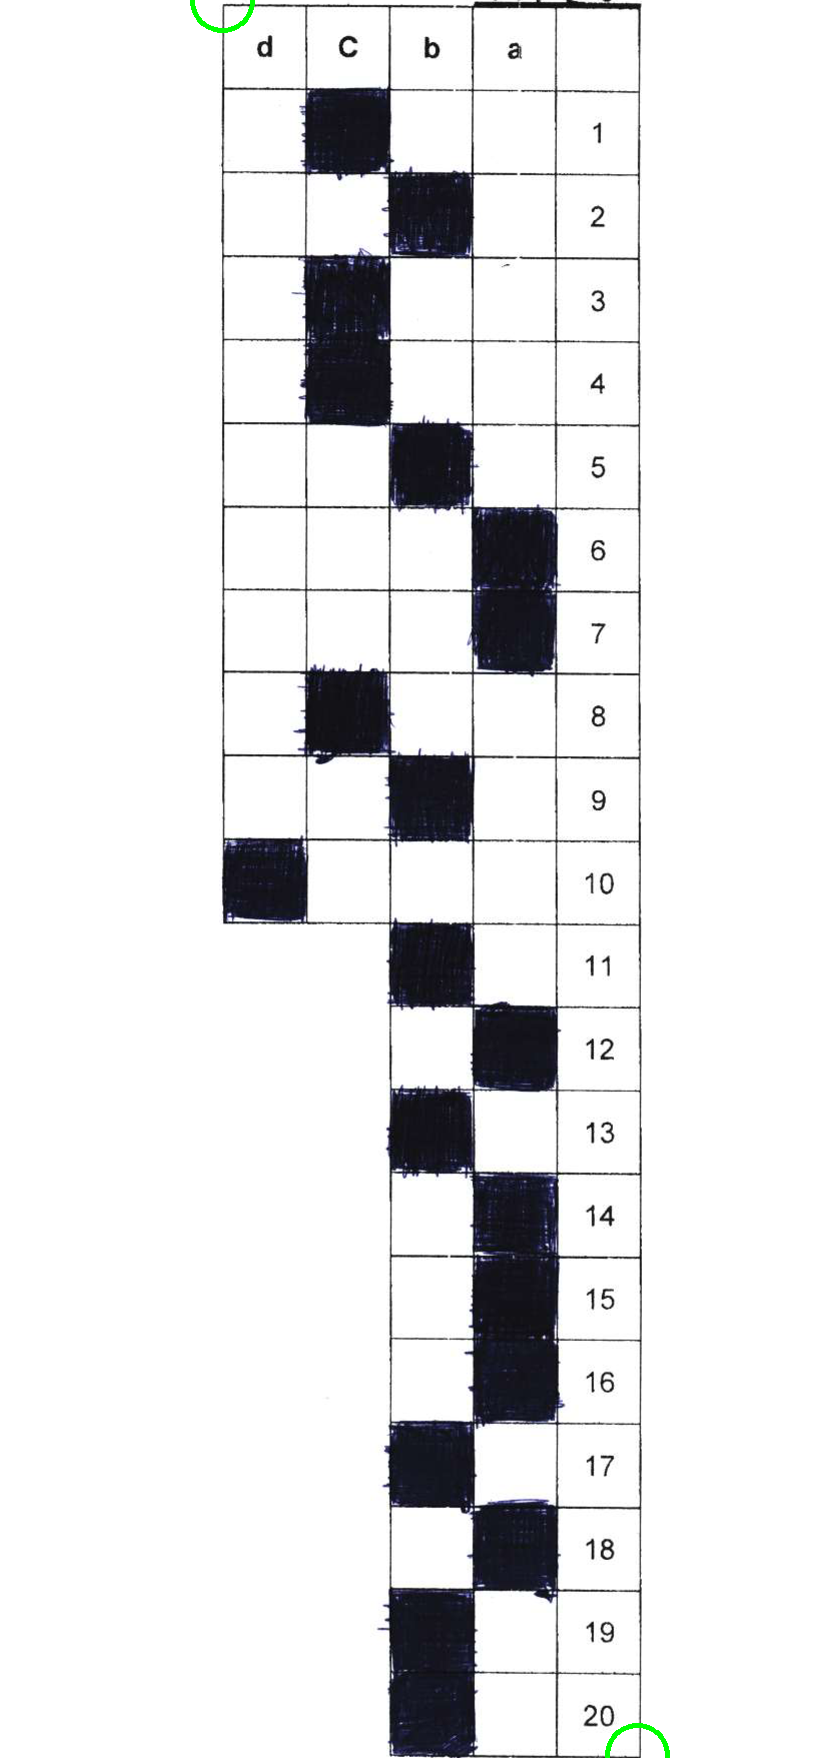

In [ ]:
img_copy = imagem.copy()
cv2.circle(img_copy, (int(x_se), int(y_se)), 30, (0,255,0), 3)
cv2.circle(img_copy, (int(x_id), int(y_id)), 30, (0,255,0), 3)

cv2_imshow(img_copy)

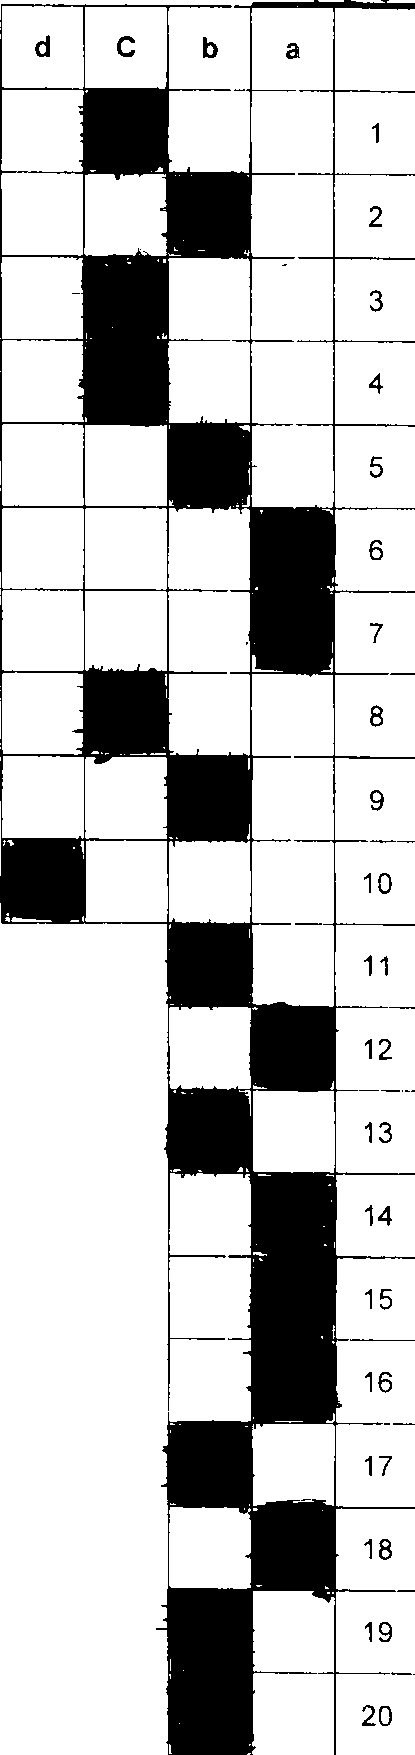

In [ ]:
img_cortada = img_binarizada[int(y_se):int(y_id),
                             int(x_se):int(x_id)]

cv2_imshow(img_cortada)

In [ ]:
QTD_QUESTOES = 21 # Quantidade de questões+1
QTD_ALTERNATIVAS = 5 # Quantidade de alternativas+1

def obtem_resposta(img, questao_numero):

  map_indice = {3:'a', 2:'b', 1:'c', 0:'d'}

  espacamento_questao = img.shape[0] / QTD_QUESTOES
  espacamento_alternativa = img.shape[1] / QTD_ALTERNATIVAS

  inicio_questao = int(questao_numero*espacamento_questao)
  fim_questao = int((questao_numero + 1 )*espacamento_questao)

  questao = img[inicio_questao : fim_questao, :]

  resp = np.empty(4)
  for alternativa in range(QTD_ALTERNATIVAS-1):
    inicio_alternativa = int(alternativa * espacamento_alternativa) 
    fim_alternativa = int((alternativa+1) * espacamento_alternativa)

    resp[alternativa] = np.mean(questao[ : , inicio_alternativa : fim_alternativa])

  indice = np.where(resp == np.amin(resp))[0][0]

  return map_indice[indice]


In [ ]:
def corrige(img):
  respostas = {}
  for questao in range(1, QTD_QUESTOES):
    respostas[questao] = obtem_resposta(img_cortada,questao)

  return respostas


In [ ]:
def ler_csv(caminho_csv, nome_prova):
    conteudo = np.loadtxt(caminho_csv, dtype=str, delimiter=',')
    indice = np.where(conteudo[:,:1] == nome_prova)[0][0]

    return conteudo[indice]

In [ ]:
gabarito = pd.read_csv(path('corretas.csv')).set_index('image')

gabarito

1     b
2     b
3     c
4     c
5     a
6     a
7     d
8     a
9     a
10    d
11    b
12    a
13    b
14    a
15    a
16    b
17    b
18    a
19    a
20    a
Name: image0, dtype: object

In [ ]:
IMG = 'image1'

respostas = corrige(img_cortada)
correta = gabarito.loc[IMG]

print('Quetao\tLetra\tVerdadeira')
for questao in range(1,QTD_QUESTOES):
  print('{} \t {} \t {}'.format(questao, respostas[questao], correta[questao-1]))

Quetao	Letra	Verdadeira
1 	 c 	 c
2 	 b 	 b
3 	 c 	 c
4 	 c 	 c
5 	 b 	 b
6 	 a 	 a
7 	 a 	 a
8 	 c 	 c
9 	 b 	 b
10 	 d 	 d
11 	 b 	 b
12 	 a 	 a
13 	 b 	 b
14 	 a 	 a
15 	 a 	 a
16 	 a 	 a
17 	 b 	 b
18 	 a 	 a
19 	 b 	 b
20 	 b 	 b
